In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
import csv
import os
import tabulate
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, roc_curve
warnings.filterwarnings('ignore')
%matplotlib inline
get_ipython().magic('matplotlib inline')
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8)
np.random.seed(10)

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.externals import joblib
import xgboost as xgb
from sklearn import metrics

In [2]:
df=pd.read_csv('final.csv')

df.shape

(431420, 32)

In [3]:
df.columns

Index(['DAY_OF_WEEK', 'FL_DATE', 'UNIQUE_CARRIER', 'FL_NUM', 'ORIGIN', 'DEST',
       'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DISTANCE',
       'DEP_HOUR', 'ARR_HOUR', 'YEAR', 'MONTH', 'DAY_OF_MONTH',
       'DEP_HOURLYVISIBILITY', 'DEP_HOURLYDRYBULBTEMPC', 'DEP_HOURLYWindSpeed',
       'DEP_HOURLYPrecip', 'ARR_HOURLYVISIBILITY', 'ARR_HOURLYDRYBULBTEMPC',
       'ARR_HOURLYWindSpeed', 'ARR_HOURLYPrecip', 'DEP_AVG_HOURLYVISIBILITY',
       'DEP_AVG_HOURLYDRYBULBTEMPC', 'DEP_AVG_HOURLYWindSpeed',
       'DEP_AVG_HOURLYPrecip', 'ARR_AVG_HOURLYVISIBILITY',
       'ARR_AVG_HOURLYDRYBULBTEMPC', 'ARR_AVG_HOURLYWindSpeed',
       'ARR_AVG_HOURLYPrecip'],
      dtype='object')

In [4]:
#Drop Variables which do not have correlation with arrival delays/cannot be predicted until the flight
df.drop(['CANCELLATION_CODE','YEAR','DAY_OF_MONTH','FL_NUM','DEP_DELAY','DEP_AVG_HOURLYVISIBILITY','DEP_AVG_HOURLYDRYBULBTEMPC','DEP_AVG_HOURLYWindSpeed','DEP_AVG_HOURLYPrecip','ARR_AVG_HOURLYVISIBILITY','ARR_AVG_HOURLYDRYBULBTEMPC','ARR_AVG_HOURLYWindSpeed','ARR_AVG_HOURLYPrecip'],axis=1, inplace=True)

In [5]:
df.dtypes

DAY_OF_WEEK                 int64
FL_DATE                    object
UNIQUE_CARRIER             object
ORIGIN                     object
DEST                       object
ARR_DELAY                 float64
CANCELLED                 float64
DISTANCE                  float64
DEP_HOUR                    int64
ARR_HOUR                    int64
MONTH                       int64
DEP_HOURLYVISIBILITY      float64
DEP_HOURLYDRYBULBTEMPC    float64
DEP_HOURLYWindSpeed       float64
DEP_HOURLYPrecip          float64
ARR_HOURLYVISIBILITY      float64
ARR_HOURLYDRYBULBTEMPC    float64
ARR_HOURLYWindSpeed       float64
ARR_HOURLYPrecip          float64
dtype: object

In [6]:
df.isnull().sum()

DAY_OF_WEEK                   0
FL_DATE                       0
UNIQUE_CARRIER                0
ORIGIN                        0
DEST                          0
ARR_DELAY                     0
CANCELLED                     0
DISTANCE                      0
DEP_HOUR                      0
ARR_HOUR                      0
MONTH                         0
DEP_HOURLYVISIBILITY      35266
DEP_HOURLYDRYBULBTEMPC    35266
DEP_HOURLYWindSpeed       35266
DEP_HOURLYPrecip          35266
ARR_HOURLYVISIBILITY      35321
ARR_HOURLYDRYBULBTEMPC    35321
ARR_HOURLYWindSpeed       35321
ARR_HOURLYPrecip          35321
dtype: int64

In [7]:
df = df[pd.notnull(df['DEP_HOURLYVISIBILITY'])]
df = df[pd.notnull(df['ARR_HOURLYVISIBILITY'])]

In [8]:
df.isnull().sum()

DAY_OF_WEEK               0
FL_DATE                   0
UNIQUE_CARRIER            0
ORIGIN                    0
DEST                      0
ARR_DELAY                 0
CANCELLED                 0
DISTANCE                  0
DEP_HOUR                  0
ARR_HOUR                  0
MONTH                     0
DEP_HOURLYVISIBILITY      0
DEP_HOURLYDRYBULBTEMPC    0
DEP_HOURLYWindSpeed       0
DEP_HOURLYPrecip          0
ARR_HOURLYVISIBILITY      0
ARR_HOURLYDRYBULBTEMPC    0
ARR_HOURLYWindSpeed       0
ARR_HOURLYPrecip          0
dtype: int64

In [9]:
df.shape
df2=df.copy()

In [10]:
print (df[df.ARR_DELAY > 1000 ].shape[0])

77


In [44]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /Users/panda/anaconda3/envs/myenv/lib/python3.6/site-packages (0.4.3)


In [11]:
#Remove data redundancy
df['ARR_HOUR'] = df['ARR_HOUR'].apply(lambda x:0 if x == 24 else x)


#Convert to Dummy Variables
df = pd.concat([df,pd.get_dummies(df['MONTH'],prefix="MONTH")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DAY_OF_WEEK'],prefix="DAY_OF_WEEK")],axis=1)
df = pd.concat([df,pd.get_dummies(df['UNIQUE_CARRIER'],prefix="UNIQUE_CARRIER")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ORIGIN'],prefix="ORIGIN")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEST'],prefix="DEST")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEP_HOUR'],prefix="DEP_HOUR")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ARR_HOUR'],prefix="ARR_HOUR")],axis=1)

df.drop(['MONTH','DAY_OF_WEEK','UNIQUE_CARRIER','ORIGIN','DEST','DEP_HOUR','ARR_HOUR'],axis=1,inplace=True)
#DELAY_YN -> Delay Yes or No -> 1 if Delay>5 minutes, else 0
df['DELAY_YN'] = df['ARR_DELAY'].apply(lambda x:1 if x>=5 else 0)

df.drop(['FL_DATE'],axis=1,inplace=True)

In [12]:
df.head()

,ARR_DELAY,CANCELLED,DISTANCE,DEP_HOURLYVISIBILITY,DEP_HOURLYDRYBULBTEMPC,DEP_HOURLYWindSpeed,DEP_HOURLYPrecip,ARR_HOURLYVISIBILITY,ARR_HOURLYDRYBULBTEMPC,ARR_HOURLYWindSpeed,ARR_HOURLYPrecip,MONTH_11,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,UNIQUE_CARRIER_9E,UNIQUE_CARRIER_AA,UNIQUE_CARRIER_AS,UNIQUE_CARRIER_DL,UNIQUE_CARRIER_EV,UNIQUE_CARRIER_F9,...,ARR_HOUR_0,ARR_HOUR_1,ARR_HOUR_2,ARR_HOUR_3,ARR_HOUR_4,ARR_HOUR_5,ARR_HOUR_6,ARR_HOUR_7,ARR_HOUR_8,ARR_HOUR_9,ARR_HOUR_10,ARR_HOUR_11,ARR_HOUR_12,ARR_HOUR_13,ARR_HOUR_14,ARR_HOUR_15,ARR_HOUR_16,ARR_HOUR_17,ARR_HOUR_18,ARR_HOUR_19,ARR_HOUR_20,ARR_HOUR_21,ARR_HOUR_22,ARR_HOUR_23,DELAY_YN
0,-2.0,0.0,544.0,9.322264,13.9,5.0,0.0,10.000000,11.1,13.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-13.0,0.0,544.0,9.322264,5.6,3.0,0.0,10.000000,9.4,8.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-21.0,0.0,544.0,10.000000,15.6,7.0,0.0,10.000000,10.6,3.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,32.0,0.0,544.0,9.322264,11.7,9.0,0.0,9.322264,11.7,18.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,67.0,0.0,544.0,9.322264,8.9,7.0,0.0,9.322264,5.6,13.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


Text(0.5, 1.0, 'Distribution of Labels/Classes in the Dataset')

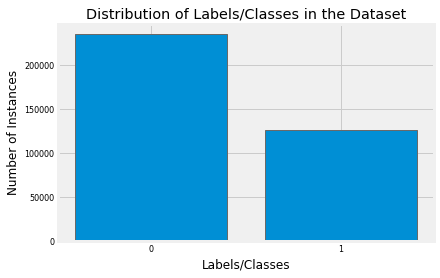

In [64]:
# Getting the no. of instances with Label 0
n_class_0 = df[df['DELAY_YN']==0].shape[0]
# Getting the no. of instances with label 1
n_class_1 = df[df['DELAY_YN']==1].shape[0]
# Bar Visualization of Class Distribution
import matplotlib.pyplot as plt # required library
x = ['0', '1']
y = np.array([n_class_0, n_class_1])
plt.bar(x, y)
plt.xlabel('Labels/Classes')
plt.ylabel('Number of Instances')
plt.title('Distribution of Labels/Classes in the Dataset')

In [13]:
df.drop(['DISTANCE'],axis=1,inplace=True)

In [66]:
df.head()

,ARR_DELAY,CANCELLED,DEP_HOURLYVISIBILITY,DEP_HOURLYDRYBULBTEMPC,DEP_HOURLYWindSpeed,DEP_HOURLYPrecip,ARR_HOURLYVISIBILITY,ARR_HOURLYDRYBULBTEMPC,ARR_HOURLYWindSpeed,ARR_HOURLYPrecip,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,UNIQUE_CARRIER_AA,UNIQUE_CARRIER_AS,UNIQUE_CARRIER_DL,UNIQUE_CARRIER_EV,UNIQUE_CARRIER_F9,UNIQUE_CARRIER_MQ,UNIQUE_CARRIER_NK,UNIQUE_CARRIER_OH,UNIQUE_CARRIER_OO,...,DEP_HOUR_23,ARR_HOUR_1,ARR_HOUR_2,ARR_HOUR_3,ARR_HOUR_4,ARR_HOUR_5,ARR_HOUR_6,ARR_HOUR_7,ARR_HOUR_8,ARR_HOUR_9,ARR_HOUR_10,ARR_HOUR_11,ARR_HOUR_12,ARR_HOUR_13,ARR_HOUR_14,ARR_HOUR_15,ARR_HOUR_16,ARR_HOUR_17,ARR_HOUR_18,ARR_HOUR_19,ARR_HOUR_20,ARR_HOUR_21,ARR_HOUR_22,ARR_HOUR_23,DELAY_YN
0,-2.0,0.0,9.322264,13.9,5.0,0.0,10.000000,11.1,13.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-13.0,0.0,9.322264,5.6,3.0,0.0,10.000000,9.4,8.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-21.0,0.0,10.000000,15.6,7.0,0.0,10.000000,10.6,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,32.0,0.0,9.322264,11.7,9.0,0.0,9.322264,11.7,18.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,67.0,0.0,9.322264,8.9,7.0,0.0,9.322264,5.6,13.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [67]:
np.nan_to_num(df)

array([[ -2.        ,   0.        ,   9.32226377, ...,   0.        ,
          0.        ,   0.        ],
       [-13.        ,   0.        ,   9.32226377, ...,   0.        ,
          0.        ,   0.        ],
       [-21.        ,   0.        ,  10.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [ 11.        ,   0.        ,  10.        , ...,   0.        ,
          0.        ,   1.        ],
       [-17.        ,   0.        ,  10.        , ...,   0.        ,
          0.        ,   0.        ],
       [  3.        ,   0.        ,  10.        , ...,   0.        ,
          0.        ,   0.        ]])

In [68]:
df.shape

(360833, 91)

In [69]:
#Linear Regression on whole dataset
df['DELAY_YN'] = df['ARR_DELAY'].apply(lambda x:1 if x<360 and x>5 else 0)

In [70]:
df_late = df[df['DELAY_YN']==1].copy()

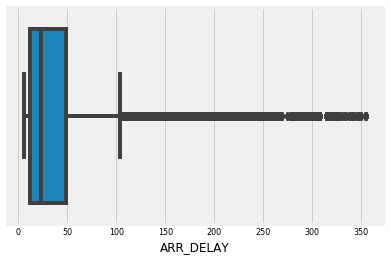

In [71]:

import seaborn as sns
sns.boxplot(x=df_late['ARR_DELAY'])

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_late.drop(['DELAY_YN','ARR_DELAY'],axis=1), 
                                                    df_late['ARR_DELAY'], test_size=0.30, random_state=101)
print('Training...')
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth= 2)
dtr.fit(X_train,y_train)

print('Predicting on test set...')
predictions = dtr.predict(X_test)

predictions = np.exp(predictions)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))



Training...
Predicting on test set...
MAE: 5.80187381245e+114


In [14]:
df_late = df[df['DELAY_YN']==1].copy()
df_late['log_delay'] = np.log(df_late['ARR_DELAY'])

print('Total positive delay datapoints:' + str(len(df_late.index)))

Total positive delay datapoints:125829


In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_late.drop(['DELAY_YN','log_delay'],axis=1), 
                                                    df_late['log_delay'], test_size=0.30, random_state=101)


print('Training...')
xg_reg = xgb.XGBRegressor(n_estimators= 3000, max_depth= 5,learning_rate =0.1)
xg_reg.fit(X_train.drop('ARR_DELAY',axis=1),y_train)

print('Predicting on test set...')
predictions4 = xg_reg.predict(X_test.drop('ARR_DELAY',axis=1))

X_test['predicted']=[np.exp(p) for p in predictions4]

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(X_test['ARR_DELAY'],X_test['predicted']))
print('MSE:', metrics.mean_squared_error(X_test['ARR_DELAY'],X_test['predicted']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test['ARR_DELAY'],X_test['predicted'])))

Training...
Predicting on test set...
MAE: 6.51483922307
MSE: 174.8636946
RMSE: 13.2236036919


In [77]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy

In [ ]:
model = XGBClassifier()
n_estimators = [100]
max_depth = [2]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')t
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

[2]
Fitting 10 folds for each of 1 candidates, totalling 10 fits


NameError: name 'predictions' is not defined

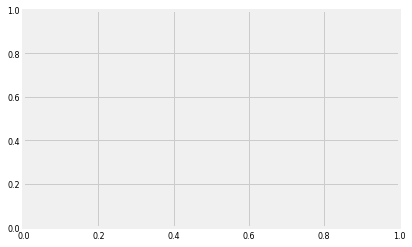

In [133]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test,predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [50]:
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [59]:
df_abc=sorted(df)

In [75]:
df_late.dtypes

ARR_DELAY                 float64
CANCELLED                 float64
DEP_HOURLYVISIBILITY      float64
DEP_HOURLYDRYBULBTEMPC    float64
DEP_HOURLYWindSpeed       float64
DEP_HOURLYPrecip          float64
ARR_HOURLYVISIBILITY      float64
ARR_HOURLYDRYBULBTEMPC    float64
ARR_HOURLYWindSpeed       float64
ARR_HOURLYPrecip          float64
DAY_OF_WEEK_2               uint8
DAY_OF_WEEK_3               uint8
DAY_OF_WEEK_4               uint8
DAY_OF_WEEK_5               uint8
DAY_OF_WEEK_6               uint8
DAY_OF_WEEK_7               uint8
UNIQUE_CARRIER_AA           uint8
UNIQUE_CARRIER_AS           uint8
UNIQUE_CARRIER_DL           uint8
UNIQUE_CARRIER_EV           uint8
UNIQUE_CARRIER_F9           uint8
UNIQUE_CARRIER_MQ           uint8
UNIQUE_CARRIER_NK           uint8
UNIQUE_CARRIER_OH           uint8
UNIQUE_CARRIER_OO           uint8
UNIQUE_CARRIER_UA           uint8
UNIQUE_CARRIER_WN           uint8
UNIQUE_CARRIER_YV           uint8
UNIQUE_CARRIER_YX           uint8
ORIGIN_CLT    

In [60]:
q1, q3= np.percentile(df_abc,[25,75])

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [45]:
import pandas as pd
import numpy as pn†
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

In [46]:
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.05, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (2,5,7),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (200, 1000),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 10,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    

In [47]:
result = bayes_cv_tuner.fit(X_train.drop('ARR_DELAY',axis=1),y_train, callback=status_print)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [48]:
from sklearn.utils.multiclass import type_of_target
type_of_target(X_train)

'continuous-multioutput'

In [28]:
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_late.drop(['DELAY_YN','log_delay'],axis=1), 
                                                    df_late['log_delay'], test_size=0.30, random_state=101)

print('Training...')
xg_reg = xgb.XGBRegressor(n_estimators= 100, max_depth= 5,learning_rate =0.16)
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xg_reg, df_late.drop(['DELAY_YN','log_delay'],axis=1), 
                                                    df_late['log_delay'], cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Training...


NameError: name 'KFold' is not defined

In [175]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(X_test['ARR_DELAY'],X_test['predicted']))
print('MSE:', metrics.mean_squared_error(X_test['ARR_DELAY'],X_test['predicted']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test['ARR_DELAY'],X_test['predicted'])))

KFold(n_splits=10, random_state=7, shuffle=False)


In [19]:
import xgboost as xgb
from sklearn import metrics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_late.drop(['DELAY_YN','log_delay'],axis=1), 
                                                    df_late['log_delay'], test_size=0.30, random_state=101)
def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(X_train.drop('ARR_DELAY',axis=1))[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(X_test)[:,1]))

# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [5,8,10],
              "n_estimators": [200],
              "learning_rate": [0.1,0.5,1],}

grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)

grid_search.fit(X_train.drop(' ARR_DELAY',axis=1),y_train)

grid_search.best_estimator_



Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: continuous is not supported

In [20]:
grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(X_train.drop('ARR_DELAY',axis=1),y_train)

auc(model, X_train, X_test)